# Exam 3

For questions 1-3 use the file 2015_CHR_Analytic_Data.csv that is added to this folder. This file needs some cleaning before use (you can use any language for this step R, python etc) (10 points)

1. Besides counties, this csv contains state totals. Such rows should be filtered out when working with the data, so that you only work with county data. 

2. Only counties with at least 30,000 people according to “2011 population estimate Value”.
3. Only columns ending in “Value” (plus the county code). To check, here is the complete list:

    -('COUNTYCODE’, 'Premature death Value', 'Poor or fair health Value', 'Poor physical health days Value', 'Poor mental health days Value', 'Low birthweight Value', 'Adult smoking Value', 'Adult obesity Value', 'Food environment index Value', 'Physical inactivity Value', 'Access to exercise opportunities Value', 'Excessive drinking Value', 'Alcohol-impaired driving deaths Value', 'Sexually transmitted infections Value', 'Teen births Value', 'Uninsured Value', 'Primary care physicians Value', 'Dentists Value', 'Mental health providers Value', 'Preventable hospital stays Value', 'Diabetic screening Value', 'Mammography screening Value', 'High school graduation Value', 'Some college Value', 'Unemployment Value', 'Children in poverty Value', 'Income inequality Value', 'Children in single-parent households Value', 'Social associations Value', 'Violent crime Value', 'Injury deaths Value', 'Air pollution - particulate matter Value', 'Drinking water violations Value', 'Severe housing problems Value', 'Driving alone to work Value', 'Long commute - driving alone Value', '2011 population estimate Value', 'Population that is not proficient in English Value', 'Population living in a rural area Value', 'Diabetes Value', 'HIV prevalence rate Value', 'Premature age-adjusted mortality Value', 'Infant mortality Value', 'Child mortality Value', 'Food insecurity Value', 'Limited access to healthy foods Value', 'Motor vehicle crash deaths Value', 'Drug poisoning deaths Value', 'Uninsured adults Value', 'Uninsured children Value', 'Health care costs Value', 'Could not see doctor due to cost Value', 'Other primary care providers Value', 'Median household income Value', 'Children eligible for free lunch Value', 'Homicide rate Value')
4. Only counties with non-nan values for each value column. (keep zeros though)

    - Output: print the total number of counties: 
	“1. TOTAL NUMBER OF COUNTIES: 823“

5. Create a new column, ‘log_paamv’ which is the log transform of 'Premature age-adjusted mortality Value'.  This will be the outcome, response variable to predict. 
6. Compare the qqplot between log_paamv and Premature age-adjusted mortality Value, did linearity improved?
7. Predict “log_paamv” (y) using all “Value” variables except REMOVED_COLUMNS (listed below) as your predictors/features (X). use multiple linear regression, to predict “log_paamv”. you must standardize the data.  
    - REMOVED_COLUMNS = ('COUNTYCODE', 'log_paamv', 'Premature age-adjusted mortality Value', 'Premature death Value',  'Uninsured adults Value', 'Teen births Value', 'Food insecurity Value', 'Injury deaths Value', 'Motor vehicle crash deaths Value', 'Drug poisoning deaths Value',  'Child mortality Value', 'Uninsured Value')


$1.$ Run PCA over all of the predictors from the previous step (all columns of X) and all counties.  (20 points)	
    - a. Produce scree plots, pca plots and biplots for the main principal components, 
    - b. In no more than one paragraph discuss your results
    - c. With the more relevant predictors (you choose how many) run a new multiple linear regression and compare this to the previous linear regression model using the AIC (you can use the anova function - anova(m1, m2) Is there an improvement.
    - d. Run regularized predictions using the principal component regression (i.e. use PCA on X and then linear regression fitting the components to y) and compare it to the models (m1 and m2)

In [1]:
#?read.csv

In [2]:
#import file
library(dplyr)
counties = read.csv(file = "2015_CHR_Analytic_Data.csv",sep = ',', dec ='.',header = TRUE ,stringsAsFactors = FALSE)
#sapply(counties, class)

#str(counties)
#counties$County
tail(counties)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



,STATECODE,COUNTYCODE,State,County,County.that.was.not.ranked,Premature.death.Value,Premature.death.Numerator,Premature.death.Denominator,Premature.death.Lower.Confidence.Interval,Premature.death.Upper.Confidence.Interval,⋯,Children.eligible.for.free.lunch.Value,Children.eligible.for.free.lunch.Numerator,Children.eligible.for.free.lunch.Denominator,Children.eligible.for.free.lunch.Lower.Confidence.Interval,Children.eligible.for.free.lunch.Upper.Confidence.Interval,Homicide.rate.Value,Homicide.rate.Numerator,Homicide.rate.Denominator,Homicide.rate.Lower.Confidence.Interval,Homicide.rate.Upper.Confidence.Interval
3186,56,35,WY,Sublette County,NA,"3,937",62,"29,557","3,019","5,047",⋯,0.087,147,"1,692",NA,NA,NA,,,NA,NA
3187,56,37,WY,Sweetwater County,NA,"7,065",420,"128,664","6,186","7,944",⋯,0.247,"1,964","7,937",NA,NA,NA,,,NA,NA
3188,56,39,WY,Teton County,NA,"3,853",112,"62,107","2,833","4,872",⋯,0.125,311,"2,481",NA,NA,NA,,,NA,NA
3189,56,41,WY,Uinta County,NA,"7,436",225,"60,881","6,158","8,714",⋯,0.273,"1,203","4,401",NA,NA,NA,,,NA,NA
3190,56,43,WY,Washakie County,NA,"7,572",105,"23,359","5,324","9,819",⋯,0.309,456,"1,478",NA,NA,NA,,,NA,NA
3191,56,45,WY,Weston County,NA,"7,819",87,"19,780","6,263","9,645",⋯,0.235,247,"1,049",NA,NA,NA,,,NA,NA


In [3]:
#removed total State
counties <- filter(counties, COUNTYCODE >'0')
head(counties)

STATECODE,COUNTYCODE,State,County,County.that.was.not.ranked,Premature.death.Value,Premature.death.Numerator,Premature.death.Denominator,Premature.death.Lower.Confidence.Interval,Premature.death.Upper.Confidence.Interval,⋯,Children.eligible.for.free.lunch.Value,Children.eligible.for.free.lunch.Numerator,Children.eligible.for.free.lunch.Denominator,Children.eligible.for.free.lunch.Lower.Confidence.Interval,Children.eligible.for.free.lunch.Upper.Confidence.Interval,Homicide.rate.Value,Homicide.rate.Numerator,Homicide.rate.Denominator,Homicide.rate.Lower.Confidence.Interval,Homicide.rate.Upper.Confidence.Interval
1,1,AL,Autauga County,NA,"8,405",754,"157,345","7,554","9,257",⋯,0.383,"3,767","9,825",NA,NA,4.6,17,"376,259",2.7,7.4
1,3,AL,Baldwin County,NA,"7,457","2,460","519,994","7,006","7,908",⋯,0.344,"9,875","28,700",NA,NA,4.3,52,"1,255,425",3.2,5.6
1,5,AL,Barbour County,NA,"8,901",414,"76,718","7,580","10,221",⋯,0.697,"2,661","3,819",NA,NA,NA,,,NA,NA
1,7,AL,Bibb County,NA,"10,729",407,"64,629","9,124","12,334",⋯,0.546,"1,934","3,539",NA,NA,7.8,13,"158,530",4.1,13.3
1,9,AL,Blount County,NA,"8,669",861,"162,346","7,802","9,536",⋯,0.442,"4,373","9,887",NA,NA,4.3,17,"398,992",2.5,6.8
1,11,AL,Bullock County,NA,"10,744",180,"30,001","8,357","13,130",⋯,0.860,"1,339","1,557",NA,NA,NA,,,NA,NA


In [4]:
"Besides counties, this csv contains state totals. Such rows should be filtered out when working with the data, so that you only work with county data."

df <- select(counties, COUNTYCODE,ends_with("Value"))

#sapply(df, class)

head(df)

[1] "Besides counties, this csv contains state totals. Such rows should be filtered out when working with the data, so that you only work with county data."

COUNTYCODE,Premature.death.Value,Poor.or.fair.health.Value,Poor.physical.health.days.Value,Poor.mental.health.days.Value,Low.birthweight.Value,Adult.smoking.Value,Adult.obesity.Value,Food.environment.index.Value,Physical.inactivity.Value,⋯,Motor.vehicle.crash.deaths.Value,Drug.poisoning.deaths.Value,Uninsured.adults.Value,Uninsured.children.Value,Health.care.costs.Value,Could.not.see.doctor.due.to.cost.Value,Other.primary.care.providers.Value,Median.household.income.Value,Children.eligible.for.free.lunch.Value,Homicide.rate.Value
1,"8,405",0.228,5.1,3.6,0.09,0.217,0.313,7.2,0.279,⋯,21.25,8.23,0.169,0.037,"9,939",0.156,18,"51,868",0.383,4.6
3,"7,457",0.127,3.3,3.8,0.09,0.206,0.250,7.6,0.252,⋯,16.57,15.29,0.199,0.054,"9,502",0.144,29,"47,539",0.344,4.3
5,"8,901",0.234,4.8,4.3,0.12,0.251,0.384,5.0,0.323,⋯,18.67,NA,0.228,0.045,"10,414",0.169,11,"30,981",0.697,NA
7,"10,729",0.179,4.7,5.1,0.13,0.259,0.373,7.6,0.332,⋯,25.87,18.93,0.193,0.042,"10,825",0.163,9,"39,781",0.546,7.8
9,"8,669",0.242,5.9,3.9,0.08,0.213,0.309,8.5,0.298,⋯,25.57,18.30,0.233,0.059,"10,281",0.173,7,"44,392",0.442,4.3
11,"10,744",0.230,4.2,NA,0.14,0.378,0.432,3.8,0.328,⋯,54.19,NA,0.232,0.041,"9,976",0.167,66,"25,937",0.860,NA


In [5]:
df1 <- as.data.frame(apply(df, 2, function(y) as.numeric(gsub("(\\d+)\\,(\\d)", "\\1\\2", y))))
#sapply(df1, class)
tail(df1)
nrow(df1)
#sum(is.na(df1))

,COUNTYCODE,Premature.death.Value,Poor.or.fair.health.Value,Poor.physical.health.days.Value,Poor.mental.health.days.Value,Low.birthweight.Value,Adult.smoking.Value,Adult.obesity.Value,Food.environment.index.Value,Physical.inactivity.Value,⋯,Motor.vehicle.crash.deaths.Value,Drug.poisoning.deaths.Value,Uninsured.adults.Value,Uninsured.children.Value,Health.care.costs.Value,Could.not.see.doctor.due.to.cost.Value,Other.primary.care.providers.Value,Median.household.income.Value,Children.eligible.for.free.lunch.Value,Homicide.rate.Value
3136,35,3937,0.116,2.9,2.9,0.11,0.165,0.211,8.7,0.203,⋯,23.84,NA,0.188,0.104,7344,0.105,60,74951,0.087,NA
3137,37,7065,0.142,3.7,3.7,0.09,0.243,0.287,8.2,0.235,⋯,28.91,14.95,0.206,0.085,7414,0.131,49,72899,0.247,NA
3138,39,3853,0.059,2.1,2.3,0.06,0.098,0.132,7.9,0.116,⋯,7.47,NA,0.238,0.130,7563,0.113,81,70201,0.125,NA
3139,41,7436,0.135,4.0,3.5,0.09,0.176,0.293,7.8,0.244,⋯,17.97,18.66,0.192,0.090,7600,0.123,47,60953,0.273,NA
3140,43,7572,0.106,2.8,2.3,0.05,0.140,0.242,8.2,0.240,⋯,25.74,NA,0.226,0.101,7940,0.099,47,50740,0.309,NA
3141,45,7819,0.162,3.5,3.0,0.09,0.198,0.288,8.1,0.269,⋯,24.22,NA,0.189,0.092,7238,0.130,28,59314,0.235,NA


[1] 3141

In [6]:
df2 <- df1[complete.cases(df1),]
#df2<- na.omit(df1)
tail(df2)
nrow(df2)

,COUNTYCODE,Premature.death.Value,Poor.or.fair.health.Value,Poor.physical.health.days.Value,Poor.mental.health.days.Value,Low.birthweight.Value,Adult.smoking.Value,Adult.obesity.Value,Food.environment.index.Value,Physical.inactivity.Value,⋯,Motor.vehicle.crash.deaths.Value,Drug.poisoning.deaths.Value,Uninsured.adults.Value,Uninsured.children.Value,Health.care.costs.Value,Could.not.see.doctor.due.to.cost.Value,Other.primary.care.providers.Value,Median.household.income.Value,Children.eligible.for.free.lunch.Value,Homicide.rate.Value
3114,133,4475,0.095,3.1,2.8,0.07,0.161,0.270,8.8,0.167,⋯,7.30,10.24,0.075,0.026,8785,0.084,69,75652,0.137,1.0
3117,139,5782,0.089,2.8,3.4,0.07,0.176,0.289,7.8,0.218,⋯,8.26,12.40,0.121,0.037,8093,0.086,86,50469,0.309,1.4
3118,141,5312,0.112,2.2,3.1,0.06,0.183,0.292,8.2,0.211,⋯,11.30,7.28,0.109,0.042,8723,0.085,151,48723,0.319,2.3
3125,13,12323,0.139,3.6,3.6,0.09,0.227,0.250,7.6,0.241,⋯,43.85,18.48,0.280,0.138,8525,0.141,54,51920,0.455,12.8
3129,21,7569,0.130,3.2,3.1,0.10,0.192,0.269,7.8,0.221,⋯,13.90,15.80,0.190,0.076,8887,0.123,120,59712,0.281,2.5
3131,25,8193,0.143,3.3,3.6,0.08,0.262,0.271,7.3,0.237,⋯,20.67,15.50,0.195,0.086,8288,0.137,105,57701,0.306,4.2


[1] 851

In [7]:
#total counties
df3 <- filter(df2, X2011.population.estimate.Value >= 30000)
nrow(df3)
#sapply(df3,class)
#tail(df3)
#df3

[1] 823

In [8]:
"Create a new column, ‘log_paamv’ which is the log transform of 'Premature age-adjusted mortality Value'. This will be the outcome, response variable to predict. "
df3$log_paamv <- log(df3$Premature.age.adjusted.mortality.Value)
tail(df3$log_paamv)

[1] "Create a new column, ‘log_paamv’ which is the log transform of 'Premature age-adjusted mortality Value'. This will be the outcome, response variable to predict. "

[1] 5.454038 5.724891 5.634075 6.196444 5.909441 5.967428

[1] "Compare the qqplot between log_paamv and Premature age-adjusted mortality Value, did linearity improved?"

[1] "Yes, after transformation, the linearity is much better than before"

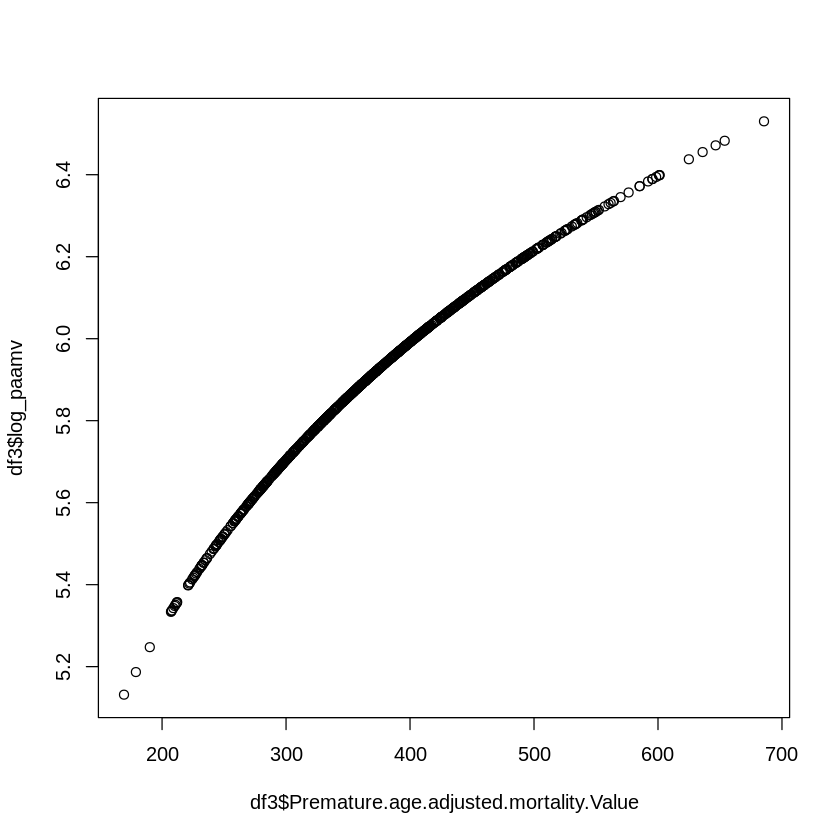

In [9]:
"Compare the qqplot between log_paamv and Premature age-adjusted mortality Value, did linearity improved?"
qqplot(df3$Premature.age.adjusted.mortality.Value,df3$log_paamv)
'Yes, after transformation, the linearity is much better than before'

In [10]:
"
Predict “log_paamv” (y) using all “Value” variables except REMOVED_COLUMNS (listed below) as your predictors/features (X). 
use multiple linear regression, to predict “log_paamv”. you must standardize the data. 
REMOVED_COLUMNS = ('COUNTYCODE', 'log_paamv', 'Premature age-adjusted mortality Value', 'Premature death Value', 
'Uninsured adults Value', 'Teen births Value', 'Food insecurity Value', 'Injury deaths Value', 
'Motor vehicle crash deaths Value', 'Drug poisoning deaths Value', 'Child mortality Value', 'Uninsured Value')
"
REMOVED_COLUMNS <- c('COUNTYCODE', 'log_paamv', 'Premature.age.adjusted.mortality.Value', 'Premature.death.Value', 
'Uninsured.adults.Value', 'Teen.births.Value', 'Food.insecurity.Value', 'Injury.deaths.Value', 
'Motor.vehicle.crash.deaths.Value', 'Drug.poisoning.deaths.Value', 'Child.mortality.Value', 'Uninsured.Value')
df4 <- df3[,!names(df) %in% REMOVED_COLUMNS]
df4 <- as.data.frame(scale(df4))

[1] "\nPredict “log_paamv” (y) using all “Value” variables except REMOVED_COLUMNS (listed below) as your predictors/features (X). \nuse multiple linear regression, to predict “log_paamv”. you must standardize the data. \nREMOVED_COLUMNS = ('COUNTYCODE', 'log_paamv', 'Premature age-adjusted mortality Value', 'Premature death Value', \n'Uninsured adults Value', 'Teen births Value', 'Food insecurity Value', 'Injury deaths Value', \n'Motor vehicle crash deaths Value', 'Drug poisoning deaths Value', 'Child mortality Value', 'Uninsured Value')\n"

In [110]:
fit = lm(df3$log_paamv ~ .,data = df4)
summary(fit)
#head(df4)
#str(df4)


Call:
lm(formula = df3$log_paamv ~ ., data = df4)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.197355 -0.046612  0.003982  0.047615  0.275875 

Coefficients:
                                                     Estimate Std. Error
(Intercept)                                         5.9090716  0.0025832
Poor.or.fair.health.Value                           0.0149340  0.0064858
Poor.physical.health.days.Value                     0.0068687  0.0054181
Poor.mental.health.days.Value                       0.0148499  0.0042031
Low.birthweight.Value                               0.0024900  0.0051538
Adult.smoking.Value                                 0.0299810  0.0047131
Adult.obesity.Value                                 0.0065516  0.0052069
Food.environment.index.Value                       -0.0197108  0.0101614
Physical.inactivity.Value                           0.0299745  0.0062532
Access.to.exercise.opportunities.Value             -0.0108847  0.0049557
Excessive.drinkin


1.
1.
Run PCA over all of the predictors from the previous step (all columns of X) and all counties. (20 points) 
- a. Produce scree plots, pca plots and biplots for the main principal components, 
- b. In no more than one paragraph discuss your results
- c. With the more relevant predictors (you choose how many) run a new multiple linear regression and compare this to the previous linear regression model using the AIC (you can use the anova function - anova(m1, m2) Is there an improvement.
- d. Run regularized predictions using the principal component regression (i.e. use PCA on X and then linear regression fitting the components to y) and compare it to the models (m1 and m2)

In [33]:
apply(df4, 2, var)
scaled_df <- apply(df4, 2, scale)
head(scaled_df)

Poor.or.fair.health.Value 
                                                 1 
                   Poor.physical.health.days.Value 
                                                 1 
                     Poor.mental.health.days.Value 
                                                 1 
                             Low.birthweight.Value 
                                                 1 
                               Adult.smoking.Value 
                                                 1 
                               Adult.obesity.Value 
                                                 1 
                      Food.environment.index.Value 
                                                 1 
                         Physical.inactivity.Value 
                                                 1 
            Access.to.exercise.opportunities.Value 
                                                 1 
                          Excessive.drinking.Value 
                                                 1 
             Alcohol.impaired.driving.deaths.Value 
                                                 1 
             Sexually.transmitted.infections.Value 
                                                 1 
                     Primary.care.physicians.Value 
                                                 1 
                                    Dentists.Value 
                                                 1 
                     Mental.health.providers.Value 
                                                 1 
                  Preventable.hospital.stays.Value 
                                                 1 
                          Diabetic.screening.Value 
                                                 1 
                       Mammography.screening.Value 
                                                 1 
                      High.school.graduation.Value 
                                                 1 
                                Some.college.Value 
                                                 1 
                                Unemployment.Value 
                                                 1 
                         Children.in.poverty.Value 
                                                 1 
                           Income.inequality.Value 
                                                 1 
        Children.in.single.parent.households.Value 
                                                 1 
                         Social.associations.Value 
                                                 1 
                               Violent.crime.Value 
                                                 1 
          Air.pollution...particulate.matter.Value 
                                                 1 
                   Drinking.water.violations.Value 
                                                 1 
                     Severe.housing.problems.Value 
                                                 1 
                       Driving.alone.to.work.Value 
                                                 1 
                Long.commute...driving.alone.Value 
                                                 1 
                   X2011.population.estimate.Value 
                                                 1 
Population.that.is.not.proficient.in.English.Value 
                                                 1 
           Population.living.in.a.rural.area.Value 
                                                 1 
                                    Diabetes.Value 
                                                 1 
                         HIV.prevalence.rate.Value 
                                                 1 
                            Infant.mortality.Value 
                                                 1 
             Limited.access.to.healthy.foods.Value 
                                                 1 
                          Uninsured.children.Value 
                     

Poor.or.fair.health.Value,Poor.physical.health.days.Value,Poor.mental.health.days.Value,Low.birthweight.Value,Adult.smoking.Value,Adult.obesity.Value,Food.environment.index.Value,Physical.inactivity.Value,Access.to.exercise.opportunities.Value,Excessive.drinking.Value,⋯,HIV.prevalence.rate.Value,Infant.mortality.Value,Limited.access.to.healthy.foods.Value,Uninsured.children.Value,Health.care.costs.Value,Could.not.see.doctor.due.to.cost.Value,Other.primary.care.providers.Value,Median.household.income.Value,Children.eligible.for.free.lunch.Value,Homicide.rate.Value
1.2496642,1.6100316,-0.1155688,0.3216910,0.25878570,0.2630232,0.11417464,0.3868103,-0.1411201,0.3520653,⋯,-0.1353643,0.3819324,0.6187357,-1.1170836,0.1624016,0.14410528,-1.2422464,0.1790505,-0.33294485,-0.1918051
-0.8515118,-0.6477314,0.1468122,0.3216910,0.03442380,-1.1477030,0.51023670,-0.1212769,-0.1474253,0.6351162,⋯,-0.1043943,-0.4140926,-0.4336741,-0.5777766,-0.1846427,-0.11717318,-0.9574857,-0.1636798,-0.59156087,-0.2675880
1.5409163,2.6134817,0.2780026,-0.2869336,0.17719956,0.1734533,1.40137635,0.7443531,-3.1802289,-2.2897429,⋯,-0.5260287,-0.4638441,-1.5105585,-0.4191569,0.4340015,0.51424976,-1.5270072,-0.4128302,0.05829476,-0.2675880
1.2288605,1.7354628,1.8522881,0.3216910,0.80949218,0.3078082,-0.67794949,1.3841665,-1.2066998,-0.8509009,⋯,-0.1163399,0.5311870,0.6676850,-1.1170836,1.3266280,0.75375502,-0.7503869,-0.9269652,0.64183858,1.6775046
0.7711786,0.9828752,1.5899072,0.9303157,-0.06755888,1.5393946,0.80728325,1.1207139,-2.7325593,-1.3934151,⋯,-0.4999254,1.3272120,-1.3637106,-0.3874330,0.3442623,-0.05185356,-1.6564439,-0.6538261,0.66173212,0.2123699
0.3343004,-0.3968688,-0.1155688,0.3216910,-0.55707575,-0.3639662,0.01515912,0.7255350,-0.3239711,-1.2754772,⋯,-0.3158751,1.2774604,0.0313442,-0.7363963,-0.3212368,-0.09539997,-0.6986122,-0.3911374,-0.31968249,-0.4696755


In [34]:
counties.cov <- cov(scaled_df)
counties.eigen <- eigen(counties.cov)
str(counties.eigen)

List of 2
 $ values : num [1:45] 13.12 6.22 3.45 2.39 1.78 ...
 $ vectors: num [1:45, 1:45] -0.233 -0.196 -0.167 -0.185 -0.184 ...


In [35]:
(phi <- counties.eigen$vectors[,1:2]) # creating maxtrix with eigenvectors
phi <- -phi
row.names(phi) <- colnames(df4) #assigned row names
colnames(phi) <- c("PC1", "PC2")#assigned column names
phi ##What do these values mean?? Different fragment of the variation? 

-0.233204759,0.038416439
-0.196055342,0.102133267
-0.167254657,0.082133929
-0.185210364,-0.115491144
-0.183963796,0.138812741
-0.208204726,0.097971348
0.199471992,0.178799566
-0.224516347,0.117580077
0.178869002,-0.159363748
0.139282359,-0.041740791
0.004425109,0.003265554


,PC1,PC2
Poor.or.fair.health.Value,0.233204759,-0.038416439
Poor.physical.health.days.Value,0.196055342,-0.102133267
Poor.mental.health.days.Value,0.167254657,-0.082133929
Low.birthweight.Value,0.185210364,0.115491144
Adult.smoking.Value,0.183963796,-0.138812741
Adult.obesity.Value,0.208204726,-0.097971348
Food.environment.index.Value,-0.199471992,-0.178799566
Physical.inactivity.Value,0.224516347,-0.117580077
Access.to.exercise.opportunities.Value,-0.178869002,0.159363748
Excessive.drinking.Value,-0.139282359,0.041740791


In [36]:
PC1 <- as.matrix(scaled_df) %*% phi[,1] #assigned principle component 1; %*% This operator is used to multiply a matrix with its transpose.
PC2 <- as.matrix(scaled_df) %*% phi[,2]
PC <- data.frame(County = df3$COUNTYCODE, PC1, PC2)
tail(PC)

,County,PC1,PC2
818,133,-7.5385564,-1.56486027
819,139,-4.3942932,-0.93459111
820,141,-4.7973196,-1.14851516
821,13,0.3182347,0.87148630
822,21,-2.5083215,-0.09351453
823,25,-1.8646408,0.06801332


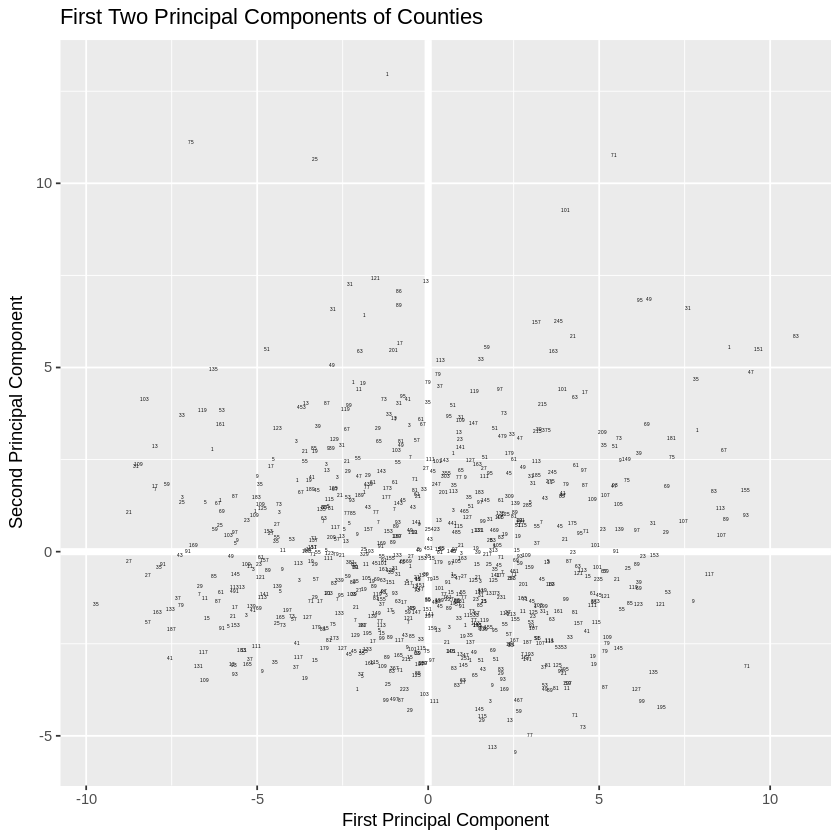

In [37]:
library(ggplot2)
# Plot Principal Components for each State
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = County), size = 1) +
  xlab("First Principal Component") + 
  ylab("Second Principal Component") + 
  ggtitle("First Two Principal Components of Counties")

In [17]:
library(tidyverse)  # data manipulation and visualization
library(gridExtra)  # plot arrangement

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.1     ✔ purrr   0.2.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [38]:
PVE <- counties.eigen$values / sum(counties.eigen$values)
round(PVE, 2)

[1] 0.29 0.14 0.08 0.05 0.04 0.04 0.03 0.03 0.03 0.02 0.02 0.02 0.02 0.02 0.01
[16] 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
[31] 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00

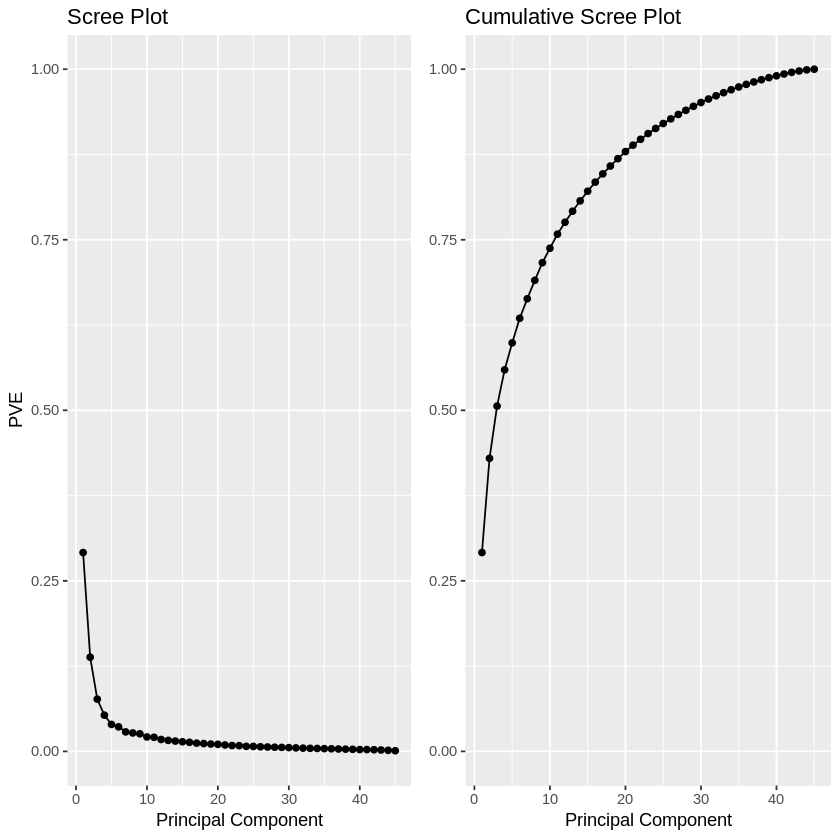

In [40]:
# PVE (aka scree) plot
PVEplot <- qplot(c(1:45), PVE) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab("PVE") +
  ggtitle("Scree Plot") +
  ylim(0, 1)

# Cumulative PVE plot
cumPVE <- qplot(c(1:45), cumsum(PVE)) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab(NULL) + 
  ggtitle("Cumulative Scree Plot") +
  ylim(0,1)

grid.arrange(PVEplot, cumPVE, ncol = 2)

In [41]:
pca_result <- prcomp(df4)
#names(pca_result)
pca_result

Standard deviations:
 [1] 3.6217916 2.4929963 1.8564889 1.5457158 1.3343196 1.2735644 1.1349058
 [8] 1.1030027 1.0778427 0.9758360 0.9648568 0.8867480 0.8523404 0.8258121
[15] 0.7975582 0.7748151 0.7386451 0.7185226 0.6970308 0.6834848 0.6507785
[22] 0.6214411 0.6160106 0.5779763 0.5731576 0.5520981 0.5385549 0.5245075
[29] 0.5140974 0.5007168 0.4797706 0.4633249 0.4504390 0.4412326 0.4271884
[36] 0.4154209 0.3969961 0.3834612 0.3704102 0.3470764 0.3451923 0.3315009
[43] 0.3039941 0.2680052 0.2096664

Rotation:
                                                            PC1          PC2
Poor.or.fair.health.Value                          -0.233204759 -0.038416439
Poor.physical.health.days.Value                    -0.196055342 -0.102133267
Poor.mental.health.days.Value                      -0.167254657 -0.082133929
Low.birthweight.Value                              -0.185210364  0.115491144
Adult.smoking.Value                                -0.183963796 -0.138812741
Adult.obesity.Value  

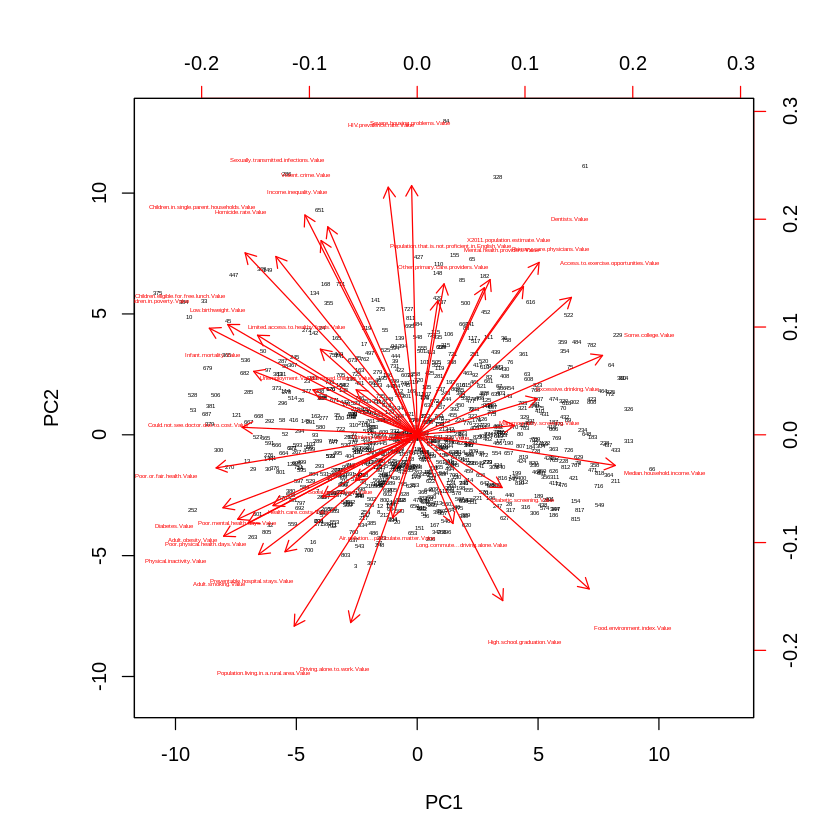

In [42]:
biplot(pca_result, scale = 0,cex = 0.3)

In [44]:
fit2 = lm(Unemployment.Value ~ ., data = df4)
summary(fit2)


Call:
lm(formula = Unemployment.Value ~ ., data = df4)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0273 -0.3951 -0.0206  0.3668  6.9577 

Coefficients:
                                                     Estimate Std. Error
(Intercept)                                        -3.832e-16  2.355e-02
Poor.or.fair.health.Value                           4.123e-02  5.911e-02
Poor.physical.health.days.Value                     4.124e-02  4.937e-02
Poor.mental.health.days.Value                      -8.299e-02  3.820e-02
Low.birthweight.Value                              -4.369e-02  4.696e-02
Adult.smoking.Value                                 1.251e-01  4.273e-02
Adult.obesity.Value                                -8.394e-02  4.737e-02
Food.environment.index.Value                       -1.188e+00  8.225e-02
Physical.inactivity.Value                          -1.341e-01  5.680e-02
Access.to.exercise.opportunities.Value             -1.051e-02  4.517e-02
Excessive.drinking.Value        

In [45]:
#comparing two models
anova(fit, fit2)

Warning message in anova.lmlist(object, ...):
“models with response ‘"Unemployment.Value"’ removed because response differs from model 1”

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Poor.or.fair.health.Value,1,2.531461e+01,2.531461e+01,4.609672e+03,0.000000e+00
Poor.physical.health.days.Value,1,9.040092e-01,9.040092e-01,1.646158e+02,2.578165e-34
Poor.mental.health.days.Value,1,9.559313e-01,9.559313e-01,1.740706e+02,5.197410e-36
Low.birthweight.Value,1,3.591540e+00,3.591540e+00,6.540027e+02,3.874494e-105
Adult.smoking.Value,1,2.798811e+00,2.798811e+00,5.096503e+02,3.630673e-87
Adult.obesity.Value,1,1.819337e+00,1.819337e+00,3.312927e+02,6.278006e-62
Food.environment.index.Value,1,1.248962e+00,1.248962e+00,2.274301e+02,2.884042e-45
Physical.inactivity.Value,1,8.458389e-01,8.458389e-01,1.540233e+02,2.147337e-32
Access.to.exercise.opportunities.Value,1,1.869045e-01,1.869045e-01,3.403444e+01,7.944012e-09
Excessive.drinking.Value,1,9.578198e-02,9.578198e-02,1.744145e+01,3.298608e-05


In [111]:
'from the analysis, we can see that premature age mortality can be predicted by many factors'

[1] "from the analysis, we can see that premature age mortality can be predicted by many factors"

$2.$ Using the K-means clustering and hirerarchichal clustering, split the counties by the predictor "Adult obesity Value" in three categories (low, medium and high obesity) and run the a new set of PCA and linear regressions, with the PCA regression values, for each split and explain wheter there is a better fit for the data. (20 points)

In [53]:
install.packages('factoextra')
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [46]:
#choosing predictor adult obesity value
obese <- df4$Adult.obesity.Value

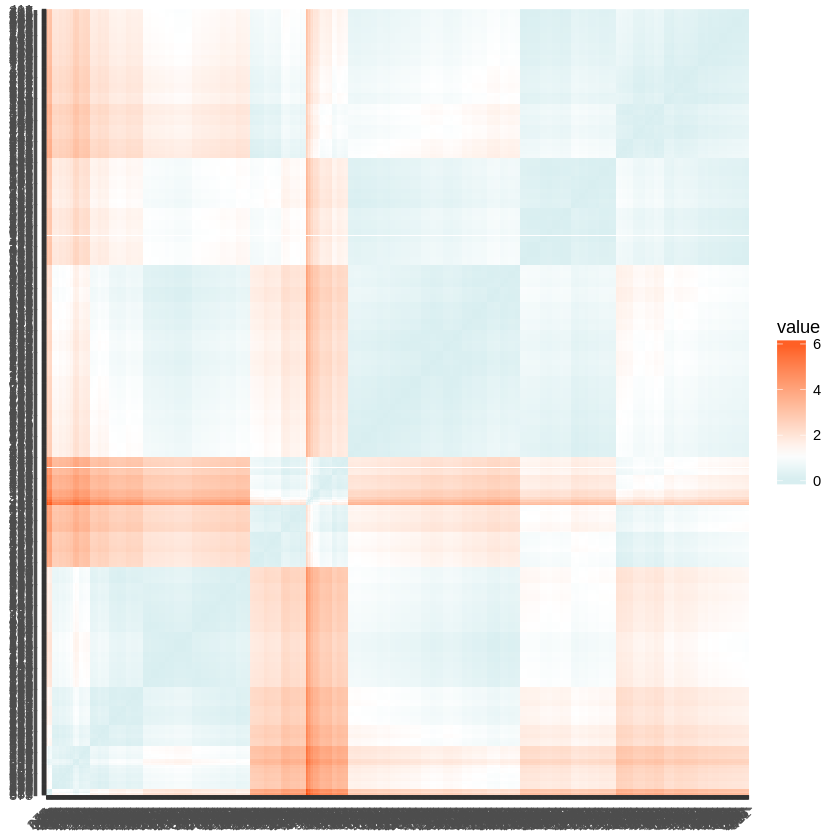

In [47]:
distance <- get_dist(obese)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

In [48]:
#split obese to 3 catergories
k <- kmeans(obese, centers = 3)
k

K-means clustering with 3 clusters of sizes 380, 169, 274

Cluster means:
        [,1]
1 -0.1255452
2 -1.4374803
3  1.0607349

Clustering vector:
  [1] 1 2 1 1 3 1 3 3 3 3 1 1 3 3 3 1 3 1 1 3 1 3 3 3 1 3 1 1 3 3 3 3 1 2 1 2 2
 [38] 1 2 1 1 2 3 3 3 1 1 3 1 3 3 3 3 3 3 1 1 3 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 1 2 3 2 1 2 2 1 1 2 2 1 1 2 3 1 1 1 3 3 1 1 2 2 3 1 2 1 2 1 2 2 2
[112] 1 1 3 2 1 2 1 2 1 3 2 1 1 2 2 1 1 1 1 1 3 1 1 3 1 1 1 1 2 2 3 2 1 1 2 1 2
[149] 3 3 3 1 1 2 2 1 1 2 1 3 1 3 1 1 3 3 1 3 3 1 1 3 1 1 2 1 1 1 2 2 1 2 2 1 1
[186] 1 2 1 1 1 3 1 1 1 1 1 3 2 1 3 1 3 3 1 1 1 3 1 1 3 2 1 3 1 3 3 3 3 1 2 1 1
[223] 1 2 3 1 1 1 2 1 1 3 1 2 1 3 3 2 1 3 3 1 1 3 3 1 1 1 3 1 1 3 1 1 1 3 3 1 1
[260] 3 1 1 3 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 1 3
[297] 3 3 3 3 3 2 1 1 1 1 1 3 3 3 1 1 2 2 3 1 1 3 3 2 2 1 2 1 2 2 2 2 2 3 1 3 3
[334] 3 3 3 1 1 3 1 1 3 1 1 1 3 1 3 2 2 3 1 3 2 3 1 1 2 2 2 2 2 1 2 3 3 3 3 3 1
[371] 3 3 3 1 3 3 3 1 3 3 3 3 3 3 1 2 3 1 3 1 3 1 1 1 

In [49]:
k$cluster
PC$Kmeans = k$cluster
PC$Kmeans = as.factor(PC$Kmeans)
low = PC[PC$Kmeans == 1,] 
medium = PC[PC$Kmeans == 2,] 
high = PC[PC$Kmeans == 3,] 

[1] 1 2 1 1 3 1 3 3 3 3 1 1 3 3 3 1 3 1 1 3 1 3 3 3 1 3 1 1 3 3 3 3 1 2 1 2 2
 [38] 1 2 1 1 2 3 3 3 1 1 3 1 3 3 3 3 3 3 1 1 3 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 1 2 3 2 1 2 2 1 1 2 2 1 1 2 3 1 1 1 3 3 1 1 2 2 3 1 2 1 2 1 2 2 2
[112] 1 1 3 2 1 2 1 2 1 3 2 1 1 2 2 1 1 1 1 1 3 1 1 3 1 1 1 1 2 2 3 2 1 1 2 1 2
[149] 3 3 3 1 1 2 2 1 1 2 1 3 1 3 1 1 3 3 1 3 3 1 1 3 1 1 2 1 1 1 2 2 1 2 2 1 1
[186] 1 2 1 1 1 3 1 1 1 1 1 3 2 1 3 1 3 3 1 1 1 3 1 1 3 2 1 3 1 3 3 3 3 1 2 1 1
[223] 1 2 3 1 1 1 2 1 1 3 1 2 1 3 3 2 1 3 3 1 1 3 3 1 1 1 3 1 1 3 1 1 1 3 3 1 1
[260] 3 1 1 3 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 1 3
[297] 3 3 3 3 3 2 1 1 1 1 1 3 3 3 1 1 2 2 3 1 1 3 3 2 2 1 2 1 2 2 2 2 2 3 1 3 3
[334] 3 3 3 1 1 3 1 1 3 1 1 1 3 1 3 2 2 3 1 3 2 3 1 1 2 2 2 2 2 1 2 3 3 3 3 3 1
[371] 3 3 3 1 3 3 3 1 3 3 3 3 3 3 1 2 3 1 3 1 3 1 1 1 3 3 3 1 1 1 1 3 1 3 1 2 2
[408] 1 1 2 1 3 2 1 1 1 2 1 1 1 2 1 2 1 1 3 2 1 2 2 2 2 2 1 2 3 2 2 2 2 2 1 1 2
[445] 1 3 3 2 2 2 1 2 1 2 1 2 1 3 2 2 1 1 1 2 1 1 1 1 2 3 1 2 1 2 1 2 2 1 2 1 2
[482] 1 1 2 3 1 1 2 1 1 1 1 1 2 1 1 1 1 3 1 2 3 1 3 1 3 1 2 2 3 1 3 1 3 1 1 2 1
[519] 1 2 1 2 3 1 3 1 3 3 3 3 1 3 1 1 1 3 2 2 1 1 3 1 1 1 1 1 3 1 2 1 1 1 1 2 1
[556] 3 3 2 3 1 1 1 1 1 1 1 1 3 3 3 1 1 3 2 1 1 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3
[593] 3 1 3 3 3 1 3 3 3 1 1 3 1 2 1 2 3 2 2 1 1 1 3 2 3 2 1 1 2 1 1 3 3 2 1 1 2
[630] 1 2 3 2 1 3 1 1 3 1 1 3 1 1 1 1 1 1 2 1 3 1 3 3 1 1 1 1 1 1 3 2 3 2 3 3 3
[667] 3 3 1 3 3 1 3 1 1 3 3 1 3 3 1 3 1 1 1 3 3 1 3 3 1 1 3 2 1 3 3 1 1 3 3 1 1
[704] 3 3 3 1 3 1 1 3 3 1 3 1 1 3 1 1 1 1 3 1 1 1 2 1 2 1 1 2 2 1 1 3 1 1 1 1 1
[741] 3 1 3 3 1 1 1 1 1 3 3 3 2 1 1 1 1 2 1 3 3 1 1 1 1 1 2 2 2 2 1 2 1 1 2 1 1
[778] 3 1 3 3 2 1 1 1 1 1 1 1 1 1 1 2 1 3 3 3 3 1 3 3 1 3 3 3 3 1 2 1 1 1 1 1 3
[815] 1 2 1 1 1 1 2 1 1

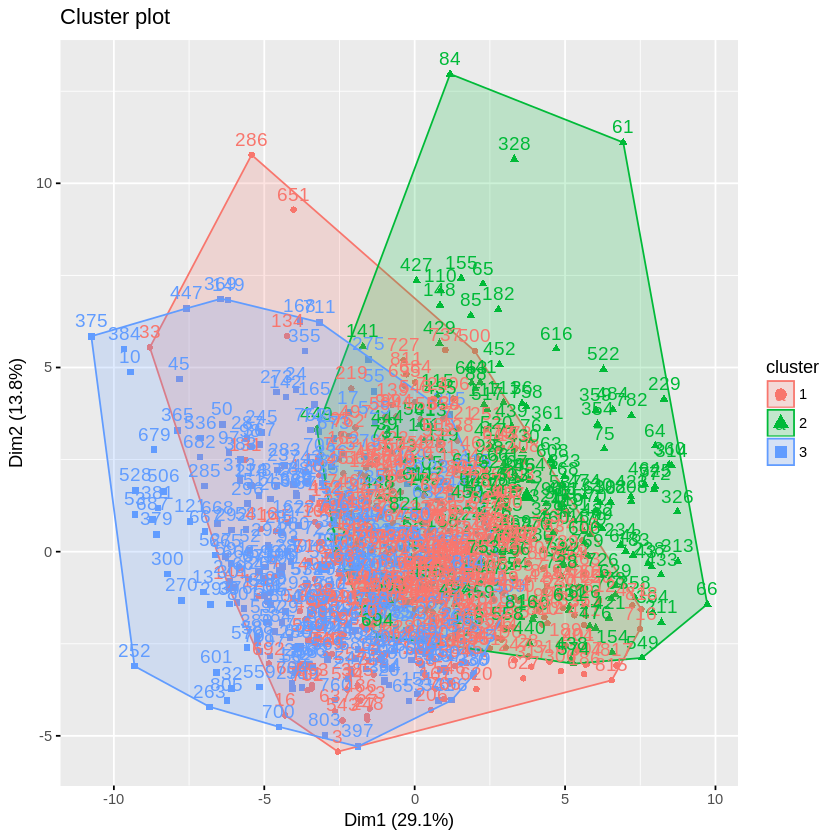

In [50]:
fviz_cluster(k, data = df4)

In [54]:
fviz_nbclust(k, FUN = hcut, method = "wss")

ERROR: Error in fviz_nbclust(k, FUN = hcut, method = "wss"): x should be an object of class matrix/data.frame or an object created by the function NbClust() [NbClust package].


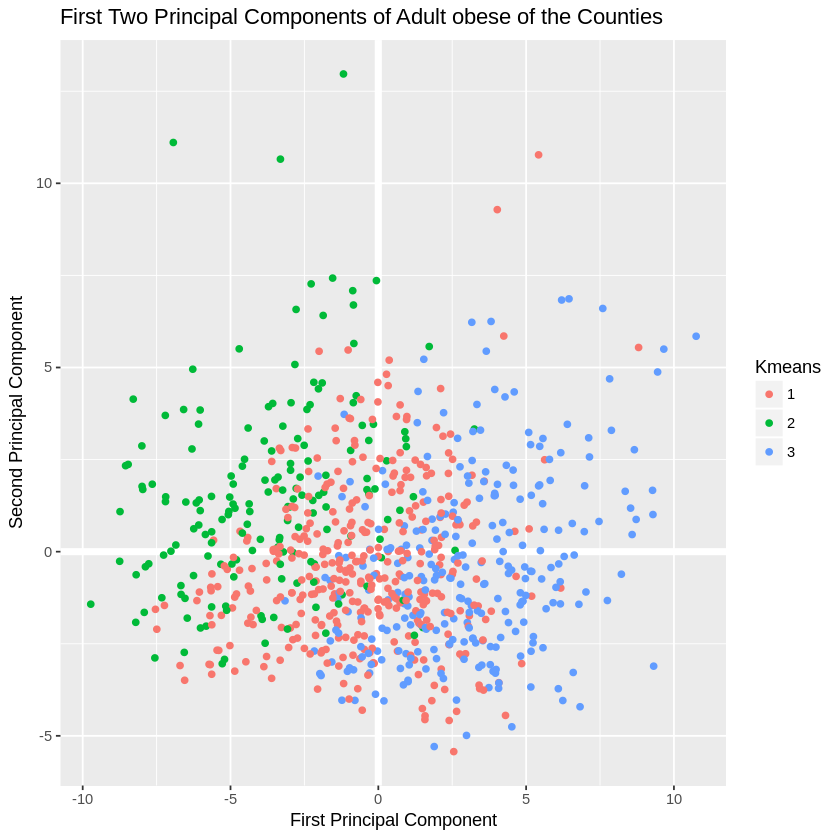

In [55]:
ggplot(PC, aes(PC1, PC2,color = Kmeans)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_point() +
  #geom_text(aes(label = State), size = 3) +
  xlab("First Principal Component") + 
  ylab("Second Principal Component") + 
  ggtitle("First Two Principal Components of Adult obese of the Counties")

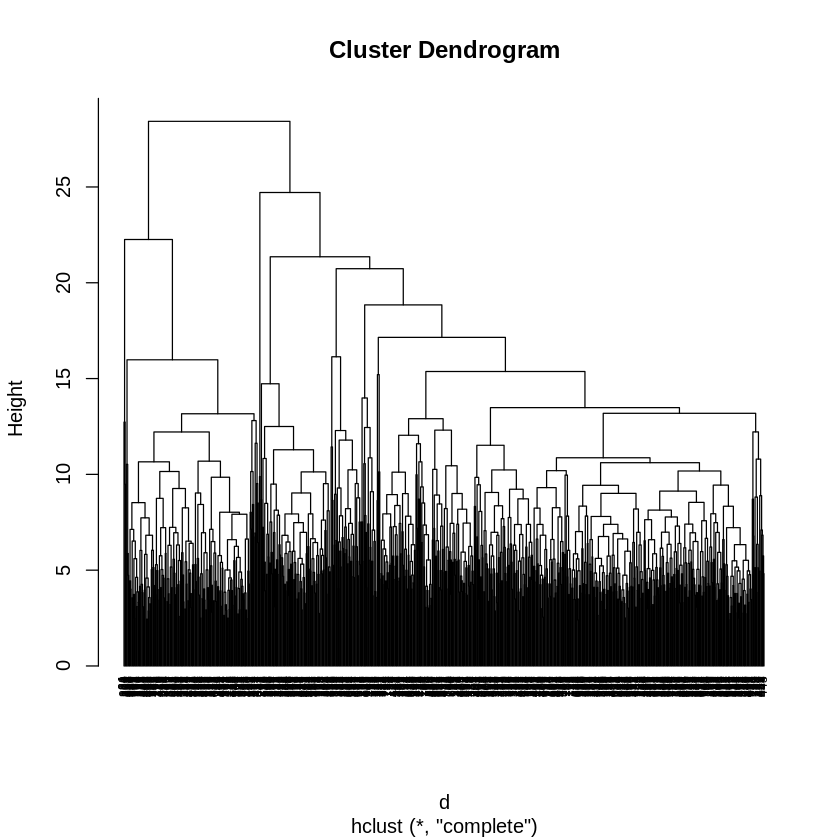

In [56]:
# Dissimilarity matrix
d <- dist(df4, method = "euclidean") #calculate eucliedean distance

# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "complete" ) #using complete linkage for hierarchial clustering

# Plot the obtained dendrogram
plot(hc1, cex = 0.6, hang = -1)

$3.$ Compare the distributions between Diabetic screening Value and Physical inactivity Value, are these two distributions similar? (10 points)
1. Use the ks test 
2. Run a correlation test to compare these distributions

In [57]:
ks.test(df4$Diabetic.screening.Value,df4$Physical.inactivity.Value)

Warning message in ks.test(df4$Diabetic.screening.Value, df4$Physical.inactivity.Value):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  df4$Diabetic.screening.Value and df4$Physical.inactivity.Value
D = 0.17861, p-value = 7.907e-12
alternative hypothesis: two-sided


[1] "the distributions of these two value are quite similar"

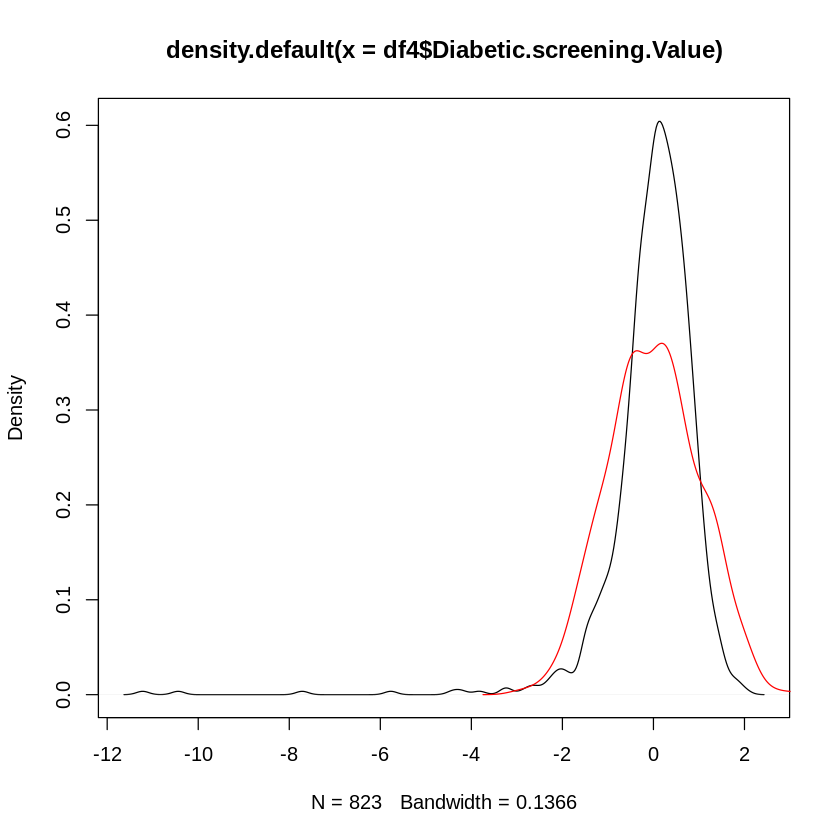

In [58]:
plot(density(df4$Diabetic.screening.Value))
lines(density(df4$Physical.inactivity.Value),col=2)
'the distributions of these two value are quite similar'

In [59]:
cdf1 <- ecdf(df4$Diabetic.screening.Value)
cdf2 <- ecdf(df4$Physical.inactivity.Value)

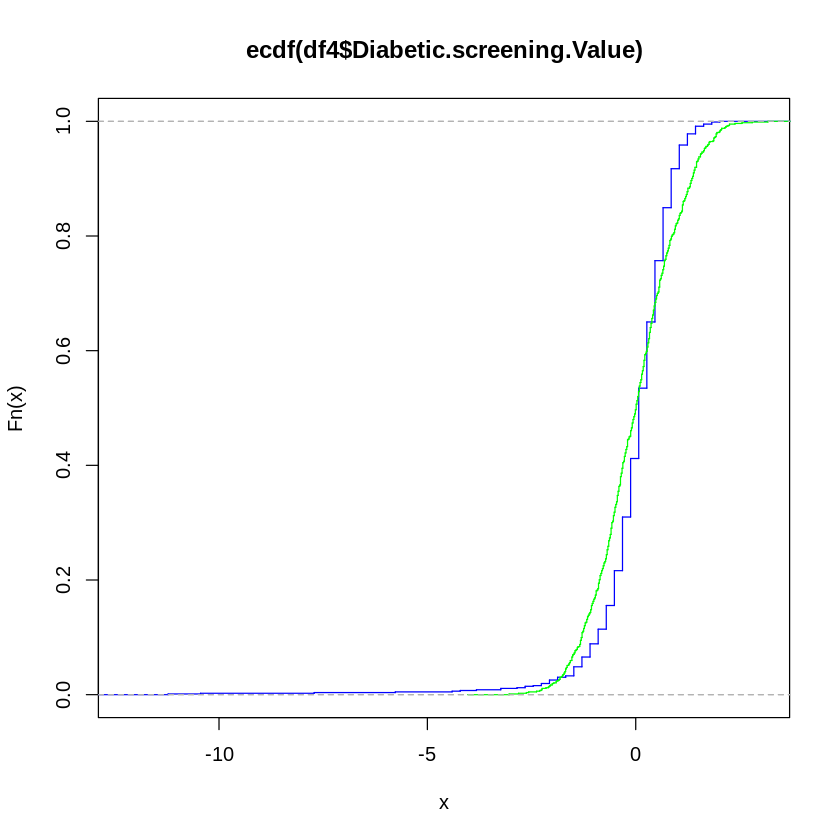

In [60]:
######################### non ggplot example
plot(cdf1, verticals=TRUE, do.points=FALSE, col="blue") 
plot(cdf2, verticals=TRUE, do.points=FALSE, col="green", add=TRUE) 
## alternative, use standard R plot of ecdf 
#plot(f.a, col="blue") 
#lines(f.b, col="green") 



In [61]:
"From the analysis comparison above, the two distributions are quite similar"

[1] "From the analysis comparison above, the two distributions are quite similar"

$4.$ Consider an example of a clinical trial of a proposed stroke-prevention medication.  Suppose 250 participants are randomly assigned to receive either the new drug or a placebo.  The participants are followed over the course of a 5-year period with the following results: (10 points)

|Group	|Stroke	|n|
|---|---|---|
|new drug|	yes	|12|
|new drug|	no	|108|
|placebo|	yes	|28|
|placebo|	no	|102|

	a.  Place new drug/placebo as rows and stroke y/n as columns, what does n1,1 equal?
	b.  What does E1,1 equal? (E is the expected value)
	c.  What is the appropriate test statistic to use?
	d.  Perform the appropriate test.  
	e.  What is the critical value of the test statistic? 
	f.  What do you conclude? 


In [86]:
#Create matrix table
study <- matrix(c(12,28,108,102), ncol = 2,byrow=FALSE)
rownames(study) <- c("new drug","placebo")
colnames(study) <- c("y","n")
study

,y,n
new drug,12,108
placebo,28,102


In [94]:
n1 = 12+28
n1

[1] 40

In [93]:
'expected value = 1st row totalx(first col total/total)'
E1 = (12+108)*((12+28)/250)
E1

[1] "expected value = 1st row totalx(first col total/total)"

[1] 19.2

In [92]:
chisq.test(study)


	Pearson's Chi-squared test with Yates' continuity correction

data:  study
X-squared = 5.3526, df = 1, p-value = 0.02069


In [81]:
install.packages("vcd")
library(vcd)

also installing the dependency ‘lmtest’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: grid

Attaching package: ‘vcd’

The following object is masked from ‘package:mosaic’:

    mplot



In [82]:
#using odds ratio
odds = oddsratio(study, log = FALSE)

In [87]:
summary(odds)
confint(odds)
'reject null hypothesis, new drug seems to have affect on pt than placebo'


z test of coefficients:

                     Estimate Std. Error z value Pr(>|z|)   
new drug:placebo/y:n  0.40476    0.15042  2.6908 0.007127 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


,2.5 %,97.5 %
new drug:placebo/y:n,0.1953734,0.8385595


[1] "reject null hypothesis, new drug seems to have affect on pt than placebo"

In [89]:
#calculate critical value
mcnemar.test(study)
'critical value is 45.89'


	McNemar's Chi-squared test with continuity correction

data:  study
McNemar's chi-squared = 45.89, df = 1, p-value = 1.251e-11


[1] "critical value is 45.89"

In [90]:
'conclusion: new drug have positive effect on patient'

[1] "conclusion: new drug have positive effect on patient"

In [63]:
install.packages('mosaic')
library(mosaic)

also installing the dependencies ‘ggformula’, ‘mosaicData’, ‘mosaicCore’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice
Loading required package: ggformula

New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")
Loading required package: mosaicData
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.

Note: If you use the Matrix package, be sure to load it BEFORE loading mosaic.

Attaching package: ‘mosaic’

The following object is masked from ‘package:Matrix’:

    mean

The following object is masked from ‘package:purrr’:

    cross

The following objects are masked from

$5.$ In unsupervised machine learning one of the main requirements to run any test is that the outcome variable needs to come from a normal distribution (10 points)

a. True

b. False

In [66]:
'b'

[1] "b"

$6.$ We will consider data from Stanford Heart Transplant Program, reported by Crowley and Hu (1977). The research question was whether receiving a heart transplant affected survival. 
Starting in November of 1967, 103 patients in need of heart transplant were accepted in the program. Sixty-nine of these patients received a transplant. Seventy-five people had an event, while 28 subjects were censored.  For each person in the program we have the date and age at the acceptance to the program, their de-identified ID, transplant status (and time of transplant if transplant was received), if a subject had a prior bypass surgery, survival time, and if the event occurred or if the subject was censored. These data are included as part of the R survival package (dataset named heart). 

Transplant status is an example of a time-varying covariate. Everybody starts as pre-transplant, then some people live to receive a transplant and others die prior to being able to receive one. If two people died at the same time, but one received a transplant 1 year prior to his death, and the other received a transplant 1 day prior to death, we cannot treat them in the same way. We must appropriately attribute a person’s time to either the “pre-transplant” or “post-transplant” period.
The way to deal with this data is to have 2 records for the patients in the study. One for the pre-transplant time, and another one for post-transplant (those subjects who did not get a transplant will only have one record). 

(20 points)

Covariate descriptions:
start, stop, event:	Entry and exit time and status for this interval of time
age:	age-48 years
year:	year of acceptance (in years after 1 Nov 1967)
surgery:	prior bypass surgery 1=yes
transplant:	received transplant 1=yes
id:	patient id

1. Compare the survival curves from people that recieve a transplant vs people that didn't are these two statistically different?
2. Build a multivariable Cox PH model with age, year, prior surgery, and transplant as covariates, but ignore the time-varying nature of transplant. Hint(in the Surv object of the model you only need to specify the "stop", and "event" variables)
    - What is the interpretation of the HR for transplant? 
3. Now build a multivariable Cox PH model with age, year, prior surgery, and transplant as covariates, and take into account the time-varying nature of transplant. Note you need to specify the "start" and "stop" time instead of one single time variable (stop) as you did above (in the Surv object of the model).
    - What is the interpretation of the HR for transplant?
    - Why do you think the results changed after taking into account the time-varying nature of transplant? 

In [67]:
install.packages("ggfortify")
install.packages("ranger")##Used for Random Forest Analysis
install.packages("survival")
library(ranger)
library(survival)
library(ggplot2)
library(dplyr)
library(ggfortify)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [95]:
library(survival)
data(heart)
head(heart)

start,stop,event,age,year,surgery,transplant,id
0,50,1,-17.155373,0.1232033,0,0,1
0,6,1,3.835729,0.2546201,0,0,2
0,1,0,6.297057,0.2655715,0,0,3
1,16,1,6.297057,0.2655715,0,1,3
0,36,0,-7.737166,0.4900753,0,0,4
36,39,1,-7.737166,0.4900753,0,1,4


In [96]:
tm <- with(heart, Surv(stop, event))
head(tm,80)

 [1]   50.0     6.0     1.0+   16.0    36.0+   39.0    18.0     3.0    51.0+
[10]  675.0    40.0    85.0    12.0+   58.0    26.0+  153.0     8.0    17.0+
[19]   81.0    37.0+ 1387.0     1.0    28.0+  308.0    36.0    20.0+   43.0 
[28]   37.0    18.0+   28.0     8.0+ 1032.0    12.0+   51.0     3.0+  733.0 
[37]   83.0+  219.0    25.0+ 1800.0+ 1401.0+  263.0    71.0+   72.0    35.0 
[46]   16.0+  852.0    16.0    17.0+   77.0    51.0+ 1587.0+   23.0+ 1572.0+
[55]   12.0    46.0+  100.0    19.0+   66.0     4.5+    5.0     2.0+   53.0 
[64]   41.0+ 1408.0+   58.0+ 1322.0+    3.0     2.0    40.0     1.0+   45.0 
[73]    2.0+  996.0    21.0+   72.0     9.0    36.0+ 1142.0+   83.0+

[1] "looking at surgery"

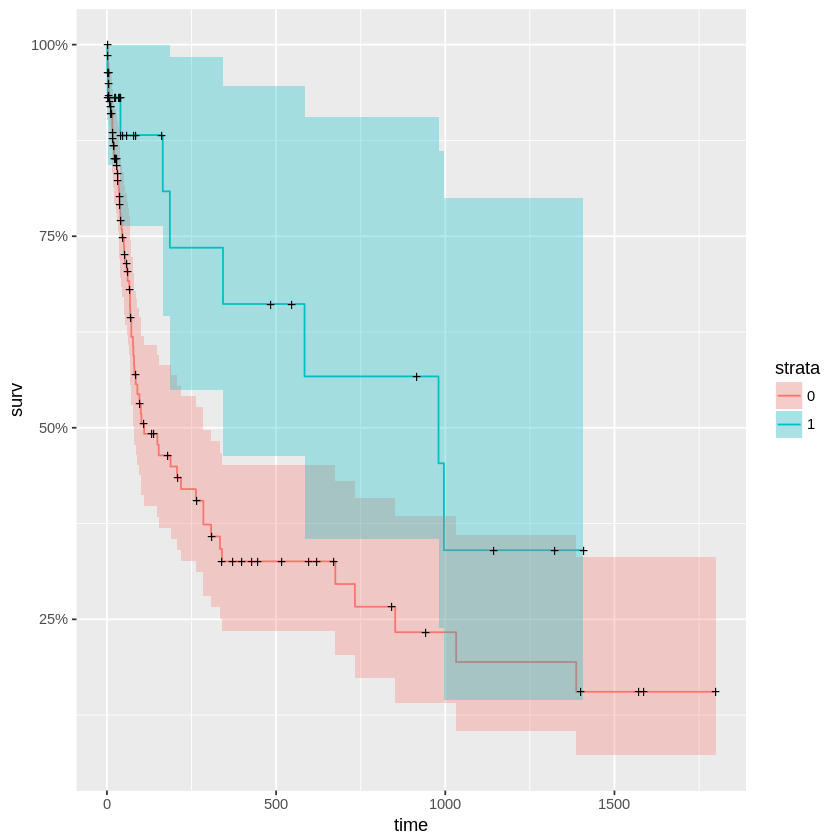

In [97]:
'looking at surgery'
km_sur_fit <- survfit(Surv(stop, event) ~ surgery, data=heart) 
autoplot(km_sur_fit)

[1] "looking at transplant"

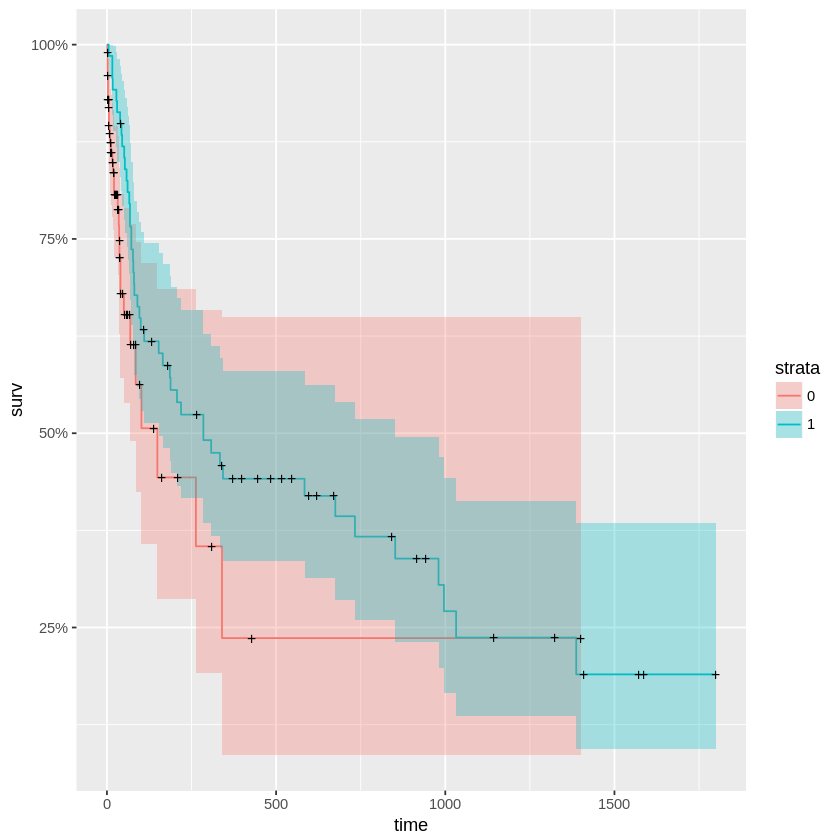

In [98]:
'looking at transplant'
km_trn_fit <- survfit(Surv(stop, event) ~ transplant, data=heart)
autoplot(km_trn_fit)

In [99]:
'from the analysis above, we can see that the survival time of patients had transplant was longer than without transplant.'

[1] "from the analysis above, we can see that the survival time of patients had transplant was longer than without transplant."

In [100]:
'2'
cox <- coxph(Surv(stop, event) ~ age + year + surgery + transplant , data = heart) #add more variables to the analysis
summary(cox)
'age, year and transplant are all significant to survival'

[1] "2"

Call:
coxph(formula = Surv(stop, event) ~ age + year + surgery + transplant, 
    data = heart)

  n= 172, number of events= 75 

                coef exp(coef) se(coef)      z Pr(>|z|)  
age          0.03175   1.03226  0.01393  2.278   0.0227 *
year        -0.17163   0.84229  0.07016 -2.446   0.0144 *
surgery     -0.63313   0.53092  0.36667 -1.727   0.0842 .
transplant1 -0.63247   0.53128  0.27131 -2.331   0.0197 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            exp(coef) exp(-coef) lower .95 upper .95
age            1.0323     0.9688    1.0044    1.0608
year           0.8423     1.1872    0.7341    0.9664
surgery        0.5309     1.8835    0.2588    1.0893
transplant1    0.5313     1.8823    0.3122    0.9042

Concordance= 0.679  (se = 0.039 )
Rsquare= 0.122   (max possible= 0.974 )
Likelihood ratio test= 22.29  on 4 df,   p=2e-04
Wald test            = 21.01  on 4 df,   p=3e-04
Score (logrank) test = 21.81  on 4 df,   p=2e-04


[1] "age, year and transplant are all significant to survival"

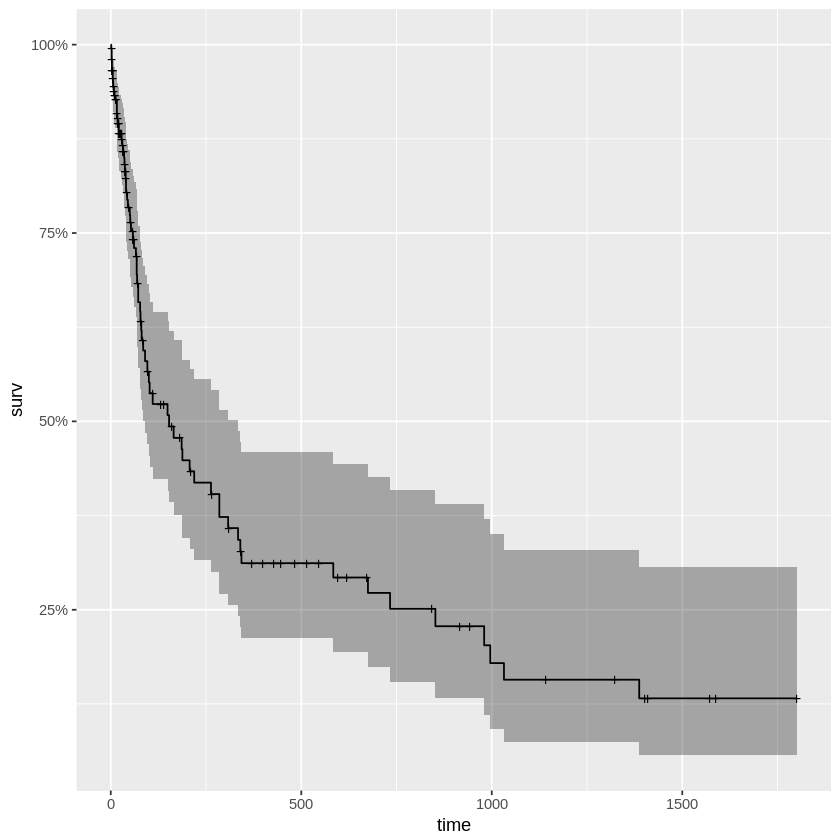

In [101]:
cox_fit <- survfit(cox)
#plot(cox_fit, main = "cph model", xlab="Days")
autoplot(cox_fit)

In [102]:
aa_fit <-aareg(Surv(stop, event) ~ age + year +
                 surgery + transplant, 
                 data = heart)
aa_fit

Call:
aareg(formula = Surv(stop, event) ~ age + year + surgery + transplant, 
    data = heart)

  n= 172 
    58 out of 62 unique event times used

                slope      coef se(coef)     z        p
Intercept    0.036400  0.021400 0.004070  5.26 1.41e-07
age          0.000225  0.000249 0.000145  1.72 8.60e-02
year        -0.002270 -0.001860 0.000842 -2.21 2.71e-02
surgery     -0.003960 -0.007540 0.002700 -2.79 5.24e-03
transplant1 -0.010800 -0.006020 0.002650 -2.27 2.32e-02

Chisq=20.14 on 4 df, p=0.000469; test weights=aalen

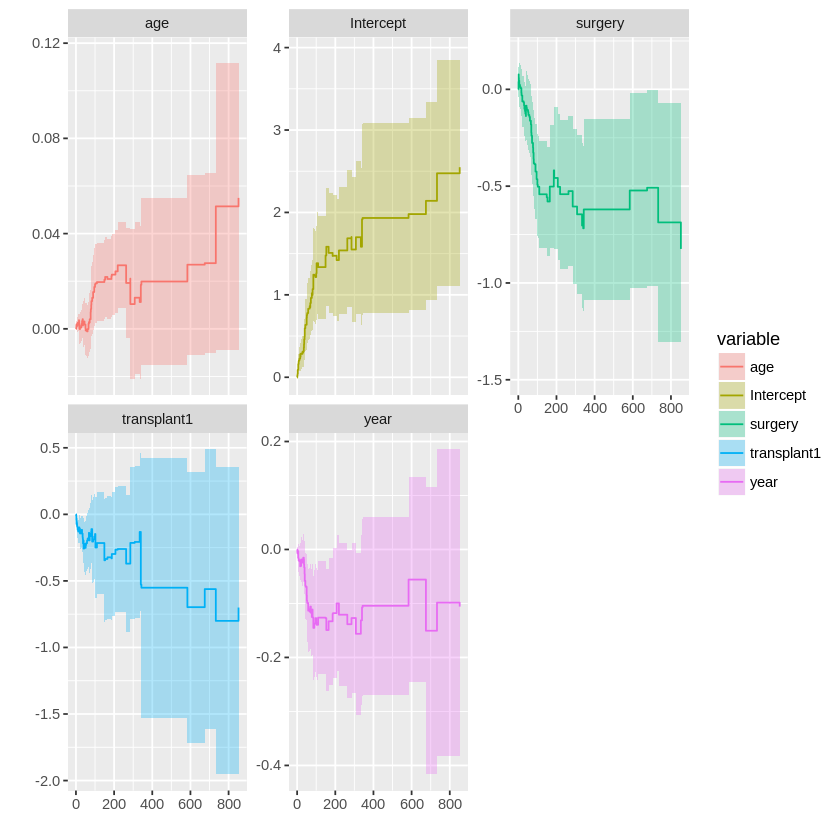

In [103]:
autoplot(aa_fit)
#look at karno, there's maybe two groups to analyze.

In [104]:
'3'
cox2 <- coxph(Surv(start,stop,event) ~ age + year + surgery + transplant , data = heart) #add more variables to the analysis
summary(cox2)
'with the time varying nature, only age and year are having significant affect to the survival of patient'

[1] "3"

Call:
coxph(formula = Surv(start, stop, event) ~ age + year + surgery + 
    transplant, data = heart)

  n= 172, number of events= 75 

                coef exp(coef) se(coef)      z Pr(>|z|)  
age          0.02717   1.02754  0.01371  1.981   0.0476 *
year        -0.14635   0.86386  0.07047 -2.077   0.0378 *
surgery     -0.63721   0.52877  0.36723 -1.735   0.0827 .
transplant1 -0.01025   0.98980  0.31375 -0.033   0.9739  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            exp(coef) exp(-coef) lower .95 upper .95
age            1.0275     0.9732    1.0003    1.0555
year           0.8639     1.1576    0.7524    0.9918
surgery        0.5288     1.8912    0.2574    1.0860
transplant1    0.9898     1.0103    0.5352    1.8307

Concordance= 0.636  (se = 0.037 )
Rsquare= 0.084   (max possible= 0.969 )
Likelihood ratio test= 15.11  on 4 df,   p=0.004
Wald test            = 14.49  on 4 df,   p=0.006
Score (logrank) test = 15.03  on 4 df,   p=0.005


[1] "with the time varying nature, only age and year are having significant affect to the survival of patient"

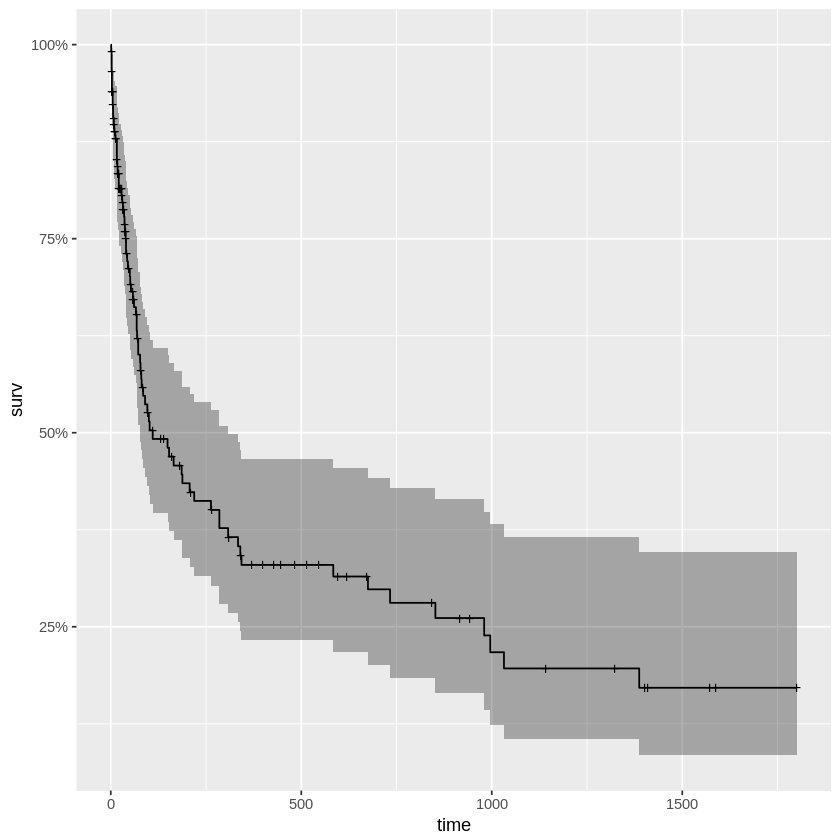

In [105]:
cox_fit2 <- survfit(cox2)
#plot(cox_fit, main = "cph model", xlab="Days")
autoplot(cox_fit2)

In [106]:
aa_fit2 <-aareg(Surv(start, stop, event) ~ age + year +
                 surgery + transplant, 
                 data = heart)
aa_fit2

Call:
aareg(formula = Surv(start, stop, event) ~ age + year + surgery + 
    transplant, data = heart)

  n= 172 
    58 out of 62 unique event times used

                slope      coef se(coef)      z        p
Intercept    0.034000  0.024700 0.005070  4.870 1.14e-06
age          0.000265  0.000356 0.000183  1.940 5.22e-02
year        -0.002210 -0.002250 0.001120 -2.010 4.48e-02
surgery     -0.003630 -0.009840 0.003780 -2.600 9.29e-03
transplant1  0.001420  0.000710 0.004670  0.152 8.79e-01

Chisq=14.76 on 4 df, p=0.00524; test weights=aalen

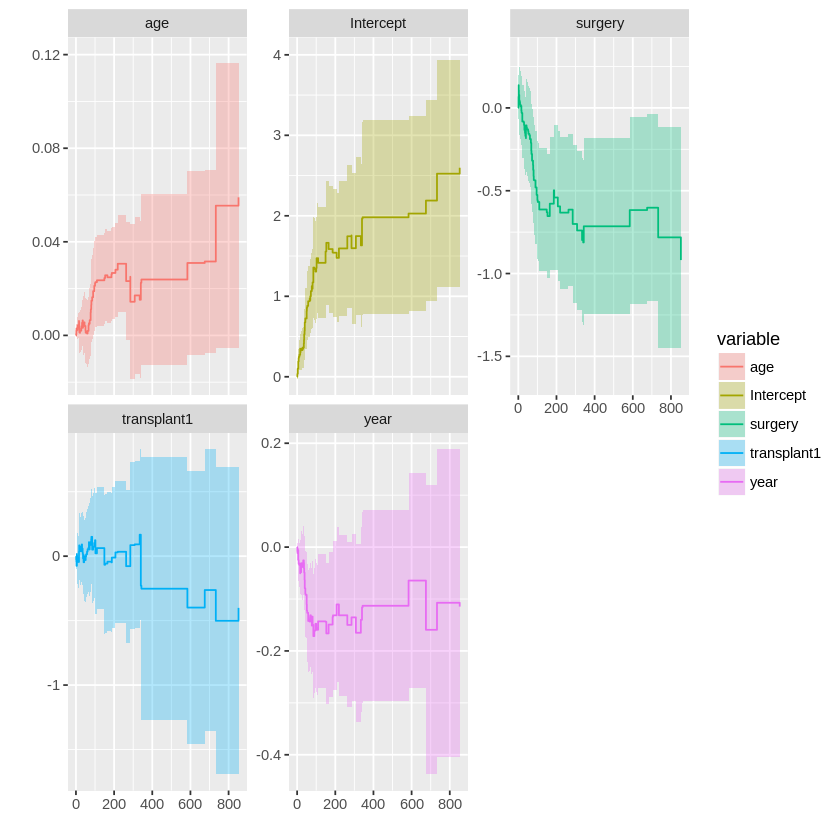

In [107]:
autoplot(aa_fit2)


In [ ]:
"taking acount of time vary nature of transplant, it seems to have effect to the result but by much differences."